# Time Series Decomposition of U.S. Construction Data

This workbook shows a time series decomposition of U.S. Construction data from January 2002 until August 2012.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Construction data obtained from U.S. Census Bureau (https://www.census.gov/construction/c30/historical_data.html) into Pandas data frame and perform initial plot of Public and Private Construction spending to assess general patterns in the data.

   Month Month-Year  Total Construction  Private Construction  \
0      1     Jan-02               59516                 45273   
1      2     Feb-02               58588                 44475   
2      3     Mar-02               63782                 49396   
3      4     Apr-02               69504                 53283   
4      5     May-02               73384                 55009   

   Public Construction  
0                14243  
1                14113  
2                14386  
3                16221  
4                18375  


Text(148, 15000, 'Public')

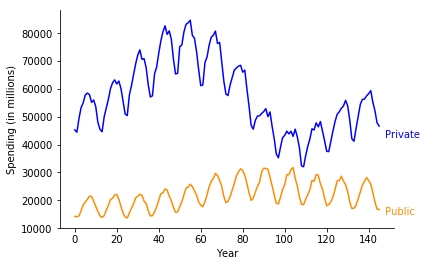

In [35]:
dfConst = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
print(dfConst.head())

fig,ax = plt.subplots()
ax.plot(dfConst['Private Construction'],label='Private Construction Spending', color = 'blue')
ax.plot(dfConst['Public Construction'],label='Public Construction Spending', color = 'darkorange')
ax.set_xlabel('Year')
ax.set_ylabel('Spending (in millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.text(148, 42500, 'Private', color = 'b')
ax.axes.text(148, 15000, 'Public', color = 'darkorange')

This code below determines the squared error in both the Private and Public Construction data by subtracting the moving average for each respective data set and subtracting it from the respective data (either Public or Private spending) before squaring the error calculation.

The code uses a window of 36 months, which essentially calculates a moving average of 18 months before and after the point in the data set.  The average squared error and total squared error are less for the Public spending data than the Private construction spending data.

Average Squared Error per Month - Private Spending:  37395667.05489795
Total squared error - Private Spending =  4113523376.0387745


Average Squared Error per Month - Public Spending:  13581548.10100133
Total squared error - Public Spending =  1493970291.1101463


            Month Month-Year  Total Construction  Private Construction  \
2003-07-31     19     Jul-03               82971                 62216   
2003-08-31     20     Aug-03               85191                 63234   
2003-09-30     21     Sep-03               83841                 61767   
2003-10-31     22     Oct-03               83133                 62813   
2003-11-30     23     Nov-03               77915                 60115   
2003-12-31     24     Dec-03               71050                 55584   
2004-01-31     25     Jan-04               64934                 50975   
2004-02-29     26     Feb-04               64138                 50449   
2004-03-31     27     Mar-04               73238                 577

Text(0.5, 0.98, 'Construction Spending vs. Relative Moving Average')

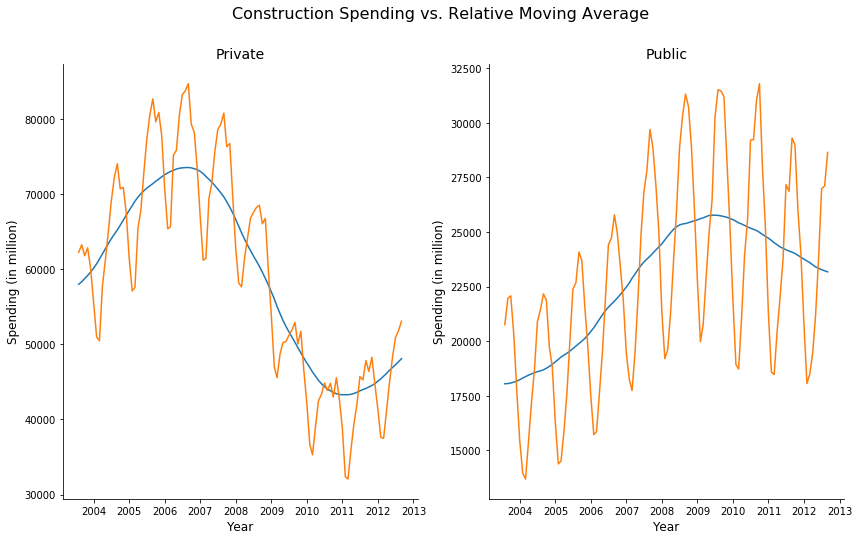

In [36]:
def sqErrPrivate(row):
    return (row['Private Construction'] - row['MovAvgPriv'])**2

def sqErrPublic(row):
    return (row['Public Construction'] - row['MovAvgPub'])**2
    
dfConst['MovAvgPriv'] = np.NaN
dfConst['MovAvgPub'] = np.NaN
dfConst['sqErrPrivate'] = np.NaN
dfConst['sqErrPublic'] = np.NaN

# Changing the DataFrame index to Date_range
dfConst.index = pd.date_range(freq='m', start='1/31/2002', periods = len(dfConst['Total Construction']))


window = 36
window = window - window % 2

# Compute the moving average in the loop below 
for i in range(int(window/2),dfConst.shape[0]-int(window/2)):
    dfConst.loc[dfConst.index[i],'MovAvgPriv'] = (0.5*dfConst.iloc[i - int(window/2)]['Private Construction'] + dfConst.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfConst.iloc[i + int(window/2)]['Private Construction'])/float(window)
    dfConst.loc[dfConst.index[i],'MovAvgPub'] = (0.5*dfConst.iloc[i - int(window/2)]['Public Construction'] + dfConst.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfConst.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfConst['sqErrPrivate'] = (dfConst['Private Construction'] - dfConst['MovAvgPriv'])**2
dfConst['sqErrPublic'] = (dfConst['Public Construction'] - dfConst['MovAvgPub'])**2

# Drop rows with N/A values that cannot be used in the analysis
dfConst.dropna(how='any',inplace=True)

fig,(ax, ax1) = plt.subplots(nrows = 1, ncols = 2)
ax.plot(dfConst['MovAvgPriv'],label='Moving Avg.')
ax.plot(dfConst['Private Construction'],label='Private Construction Spending')
ax.set_title('Private', fontsize = 14)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in million)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month - Private Spending: ',sum(dfConst['sqErrPrivate'])/len(dfConst))
print('Total squared error - Private Spending = ', sum(dfConst['sqErrPrivate']))
print('\n')

ax1.plot(dfConst['MovAvgPub'],label='Moving Avg.')
ax1.plot(dfConst['Public Construction'],label='Public Construction Spending')
ax1.set_title('Public', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in million)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
print('Average Squared Error per Month - Public Spending: ',sum(dfConst['sqErrPublic'])/len(dfConst))
print('Total squared error - Public Spending = ', sum(dfConst['sqErrPublic']))
print('\n')
print(dfConst)

fig.set_size_inches(14, 8)
fig.suptitle('Construction Spending vs. Relative Moving Average', fontsize = 16)

Add columns to the Construction data frame for the residual difference between the construction data and the moving average for both public and private data.  Code also adds columns for error in percentage, rather than numeric form.

In [37]:
dfConst['R1Private'] = dfConst['Private Construction'] - dfConst['MovAvgPriv']
dfConst['R1ErrorPrivate'] = abs((dfConst['Private Construction'] - dfConst['R1Private'])/dfConst['Private Construction'])
dfConst['R1Public'] = dfConst['Public Construction'] - dfConst['MovAvgPub']
dfConst['R1ErrorPublic'] = abs((dfConst['Public Construction'] - dfConst['R1Public'])/dfConst['Public Construction'])
dfConst.style.format({
    'MovAvgPriv': '{:,.1f}'.format,
    'sqErrPrivate': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R1ErrorPrivate': '{:,.3f}'.format,
    'MovAvgPub': '{:,.1f}'.format,
    'sqErrPublic': '{:,.1f}'.format,
    'R1Public': '{:,.1f}'.format,
    'R1ErrorPublic': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPriv,MovAvgPub,sqErrPrivate,sqErrPublic,R1Private,R1ErrorPrivate,R1Public,R1ErrorPublic
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,"57,969.4","18,050.5","18,033,352.0","7,314,395.4","4,246.6",0.932,"2,704.5",0.870
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,"58,314.9","18,058.0","24,197,107.6","15,202,201.0","4,919.1",0.922,"3,899.0",0.822
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,"58,718.9","18,084.9","9,290,896.7","15,920,765.0","3,048.1",0.951,"3,990.1",0.819
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,"59,143.6","18,126.2","13,464,822.5","4,817,354.3","3,669.4",0.942,"2,194.8",0.892
2003-11-30 00:00:00,23,Nov-03,77915,60115,17801,"59,593.5","18,170.0","271,918.8","136,161.0",521.5,0.991,-369.0,1.021
2003-12-31 00:00:00,24,Dec-03,71050,55584,15466,"60,111.7","18,235.5","20,500,394.3","7,670,130.2","-4,527.7",1.081,"-2,769.5",1.179
2004-01-31 00:00:00,25,Jan-04,64934,50975,13959,"60,687.3","18,309.2","94,329,418.8","18,923,950.0","-9,712.3",1.191,"-4,350.2",1.312
2004-02-29 00:00:00,26,Feb-04,64138,50449,13689,"61,335.4","18,377.0","118,514,067.8","21,976,953.3","-10,886.4",1.216,"-4,688.0",1.342
2004-03-31 00:00:00,27,Mar-04,73238,57796,15443,"62,017.4","18,444.6","17,820,241.4","9,009,669.3","-4,221.4",1.073,"-3,001.6",1.194
2004-04-30 00:00:00,28,Apr-04,78354,61177,17177,"62,701.1","18,502.0","2,322,787.7","1,755,625.0","-1,524.1",1.025,"-1,325.0",1.077


Plotting the residuals and calculated average residuals shows a smaller average residual for private spending over public spending

Average Residual - Private Spending:  113.25315656565621
Average Residual - Public Spending:  120.58522727272724


Text(0.5, 0.98, 'Residuals by Construction Type')

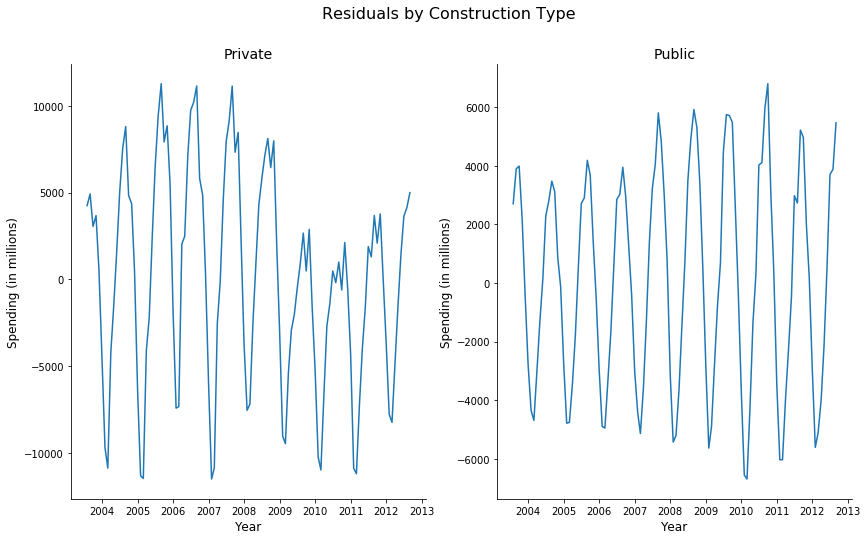

In [38]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2)
ax.plot(dfConst['R1Private'])
ax.set_title('Private', fontsize = 14)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual - Private Spending: ', sum(dfConst['R1Private'])/len(dfConst))

ax1.plot(dfConst['R1Public'])
ax1.set_title('Public', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
print('Average Residual - Public Spending: ', sum(dfConst['R1Public'])/len(dfConst))

fig.set_size_inches(14, 8)
fig.suptitle('Residuals by Construction Type', fontsize = 16)



Using the autocorrelation function, it appears both the public and private spending data show maximum correlations at period 12

In [39]:
print('Private Spending autocorrelation')

maxCorrPriv = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfConst['R1Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPriv:
        maxCorrPriv = corr
        period = i
print('\n)')
print('period = ',period,'     Maximum Correlation = ',maxCorrPriv)
print('\n')
print('Public Spending autocorrelation')

maxCorrPub = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfConst['R1Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPub:
        maxCorrPub = corr
        period = i
print('\n')
print('period = ',period,'     Maximum Correlation = ',maxCorrPub)

Private Spending autocorrelation
Correlation, lag  1     0.8250475036301713
Correlation, lag  2     0.4820939752221447
Correlation, lag  3     0.0661838628463355
Correlation, lag  4     -0.29310582259154694
Correlation, lag  5     -0.5386625150984725
Correlation, lag  6     -0.6496282831082484
Correlation, lag  7     -0.549838477475518
Correlation, lag  8     -0.3185413831731613
Correlation, lag  9     0.02011606382325631
Correlation, lag  10     0.41176952584284515
Correlation, lag  11     0.7322731003955263
Correlation, lag  12     0.8944851710984221
Correlation, lag  13     0.7299213692607464
Correlation, lag  14     0.4055214152186815
Correlation, lag  15     0.0031237974667481893
Correlation, lag  16     -0.34159925855108353
Correlation, lag  17     -0.5745510163732713
Correlation, lag  18     -0.681216824190257
Correlation, lag  19     -0.5902172854543253
Correlation, lag  20     -0.37531995989940625
Correlation, lag  21     -0.04750388422754723
Correlation, lag  22     0.3369494

The code below shows a graph of each period of 12 residual values (in this case one year) for public and private spending plotted against the average residuals for each spending category.

Text(0.5, 0.98, 'Construction Residuals by 12 month period plotted against averages')

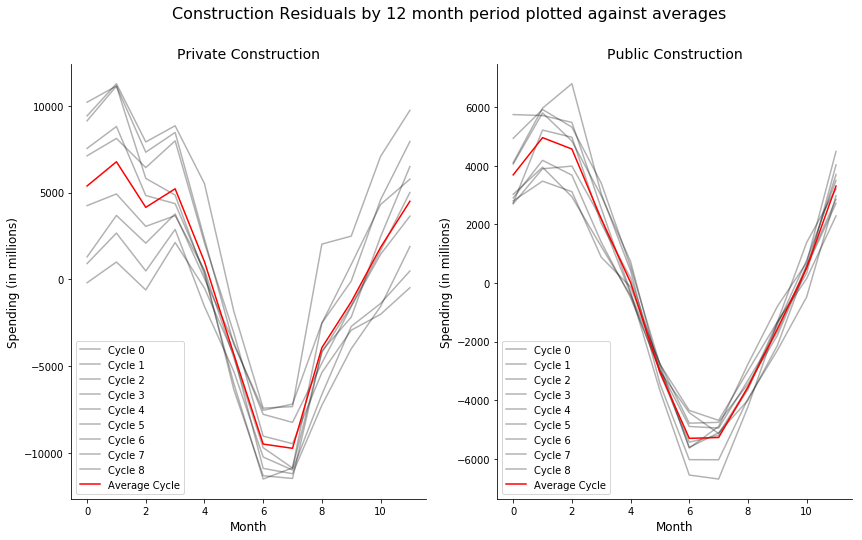

In [40]:
period = 12
cycleLen = period
numCycles = int(len(dfConst)/cycleLen + 0.5)
cyclesPriv = [dfConst.iloc[range(i*period,min((i+1)*period,len(dfConst)))]['R1Private'] for i in range(numCycles)]
ptsInCyclesPriv = [dfConst.iloc[range(i,len(dfConst['R1Private']),period)]['R1Private'].tolist() for i in range(period)]
avgPriv = [sum(pts)/len(pts) for pts in ptsInCyclesPriv]

cyclesPub = [dfConst.iloc[range(i*period,min((i+1)*period,len(dfConst)))]['R1Public'] for i in range(numCycles)]
ptsInCyclesPub = [dfConst.iloc[range(i,len(dfConst['R1Public']),period)]['R1Public'].tolist() for i in range(period)]
avgPub = [sum(pts)/len(pts) for pts in ptsInCyclesPub]


fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2)
for i in range(len(cyclesPriv)):
    ax.plot(cyclesPriv[i].values,label='Cycle '+str(i),c='k', alpha = 0.3)
ax.plot(avgPriv,label='Average Cycle',c='r')
ax.set_title('Private Construction', fontsize = 14)
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()


for i in range(len(cyclesPub)):
    ax1.plot(cyclesPub[i].values,label='Cycle '+str(i),c='k', alpha = 0.3)
ax1.plot(avgPub,label='Average Cycle',c='r')
ax1.set_title('Public Construction', fontsize = 14)
ax1.set_xlabel('Month', fontsize = 12)

ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

fig.set_size_inches(14, 8)
fig.suptitle('Construction Residuals by 12 month period plotted against averages', fontsize = 16)

Cyclicality of public and private spending graphed against the residual data for both public and private spending.

Text(0.5, 0.98, 'Cyclicality by Construction Spending Type')

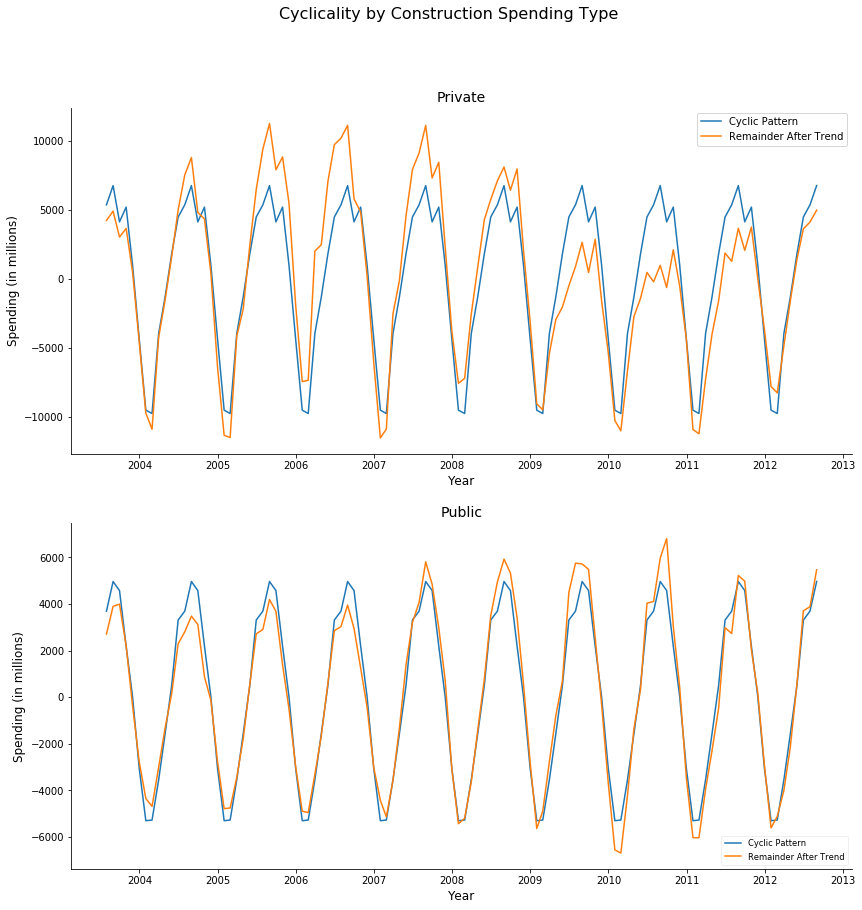

In [41]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfConst)/cycleLen + 0.5)
dfConst['Cpriv'] = np.NaN   # Creates an empty column for the cyclicality component data
dfConst['Cpub'] = np.NaN
for i in range(len(dfConst)):
    dfConst.loc[dfConst.index[i], 'Cpriv'] = avgPriv[i % cycleLen] # calculates appropriate cyclicality value
    dfConst.loc[dfConst.index[i], 'Cpub'] = avgPub[i % cycleLen]
    
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['Cpriv'],label='Cyclic Pattern')
ax.plot(dfConst['R1Private'],label='Remainder After Trend')
ax.set_title('Private', fontsize = 14)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

ax1.plot(dfConst['Cpub'],label='Cyclic Pattern')
ax1.plot(dfConst['R1Public'],label='Remainder After Trend')
ax1.set_title('Public', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc = 4, fontsize = 'small', framealpha = 0.3)
fig.set_size_inches(14, 14)
fig.suptitle('Cyclicality by Construction Spending Type', fontsize = 16)

The code below adds additional columns to the data frame for the remainder in the residual that was not explained by cyclicality.  These values are expressed in numeric and percentage terms for both public and private data.  Additionally, a column for best fit is the result of the respective moving average and cyclicality for each construction spend type. The code also calculates the average error for both public and private spending.  

In [42]:
dfConst['R2Private'] = dfConst['R1Private'] - dfConst['Cpriv']
dfConst['R2ErrorPrivate'] = abs(dfConst['R2Private']/dfConst['Private Construction'])
dfConst['fitPriv'] = dfConst['MovAvgPriv'] + dfConst['Cpriv']
dfConst.drop(['sqErrPrivate'],axis=1,inplace=True)
print('Average Error - Private: ', sum(dfConst['R2ErrorPrivate'])/len(dfConst))


dfConst['R2Public'] = dfConst['R1Public'] - dfConst['Cpub']
dfConst['R2ErrorPublic'] = abs(dfConst['R2Public']/dfConst['Public Construction'])
dfConst['fitPub'] = dfConst['MovAvgPub'] + dfConst['Cpub']
dfConst.drop(['sqErrPublic'],axis=1,inplace=True)
print('Average Error - Public: ', sum(dfConst['R2ErrorPublic'])/len(dfConst))
print(dfConst)



Average Error - Private:  0.037815969902102356
Average Error - Public:  0.024999478035219624
            Month Month-Year  Total Construction  Private Construction  \
2003-07-31     19     Jul-03               82971                 62216   
2003-08-31     20     Aug-03               85191                 63234   
2003-09-30     21     Sep-03               83841                 61767   
2003-10-31     22     Oct-03               83133                 62813   
2003-11-30     23     Nov-03               77915                 60115   
2003-12-31     24     Dec-03               71050                 55584   
2004-01-31     25     Jan-04               64934                 50975   
2004-02-29     26     Feb-04               64138                 50449   
2004-03-31     27     Mar-04               73238                 57796   
2004-04-30     28     Apr-04               78354                 61177   
2004-05-31     29     May-04               83736                 65027   
2004-06-30     30  

Shown below, Private and Public construction spending as compared to a modeled fit calculated based on moving average and cyclicality.

Text(0.5, 0.98, 'Actual Spending vs. Modeled Construction Spending')

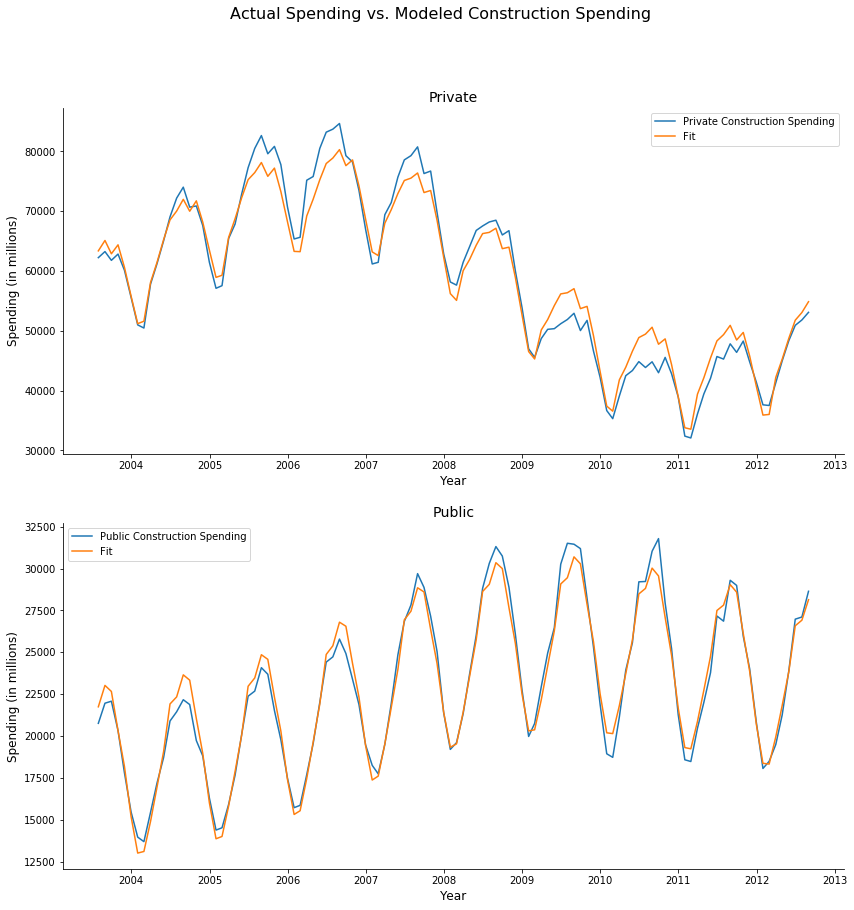

In [43]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['Private Construction'],label='Private Construction Spending')
ax.plot(dfConst['fitPriv'], label = 'Fit')
ax.set_title('Private', fontsize = 14)
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

ax1.plot(dfConst['Public Construction'],label='Public Construction Spending')
ax1.plot(dfConst['fitPub'], label = 'Fit')
ax1.set_title('Public', fontsize = 14)
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()
fig.set_size_inches(14, 14)

fig.suptitle('Actual Spending vs. Modeled Construction Spending', fontsize = 16)

The graphs below show the plotted unexplained residual over time for both public and private spending data.

Private correlation for remaining error after trend and cyclical components:
Correlation, lag  1     0.9027847832948318
Correlation, lag  2     0.7955702460094589
Correlation, lag  3     0.6560564735350041
Correlation, lag  4     0.5316739965331645
Correlation, lag  5     0.40216413631183895
Correlation, lag  6     0.3295267465640479
Correlation, lag  7     0.30585196484336047
Correlation, lag  8     0.330740986282625
Correlation, lag  9     0.3513528536369925
Correlation, lag  10     0.39197130708064265
Correlation, lag  11     0.42152079795616615
Correlation, lag  12     0.45317295658989853
period =  1      Maximum Correlation =  0.9027847832948318


Public correlation for remaining error after trend and cyclical components:
Correlation, lag  1     0.7155376451059173
Correlation, lag  2     0.46852253106604014
Correlation, lag  3     0.25515329726845276
Correlation, lag  4     -0.04701265334308256
Correlation, lag  5     -0.22016658790924398
Correlation, lag  6     -0.313203772181634

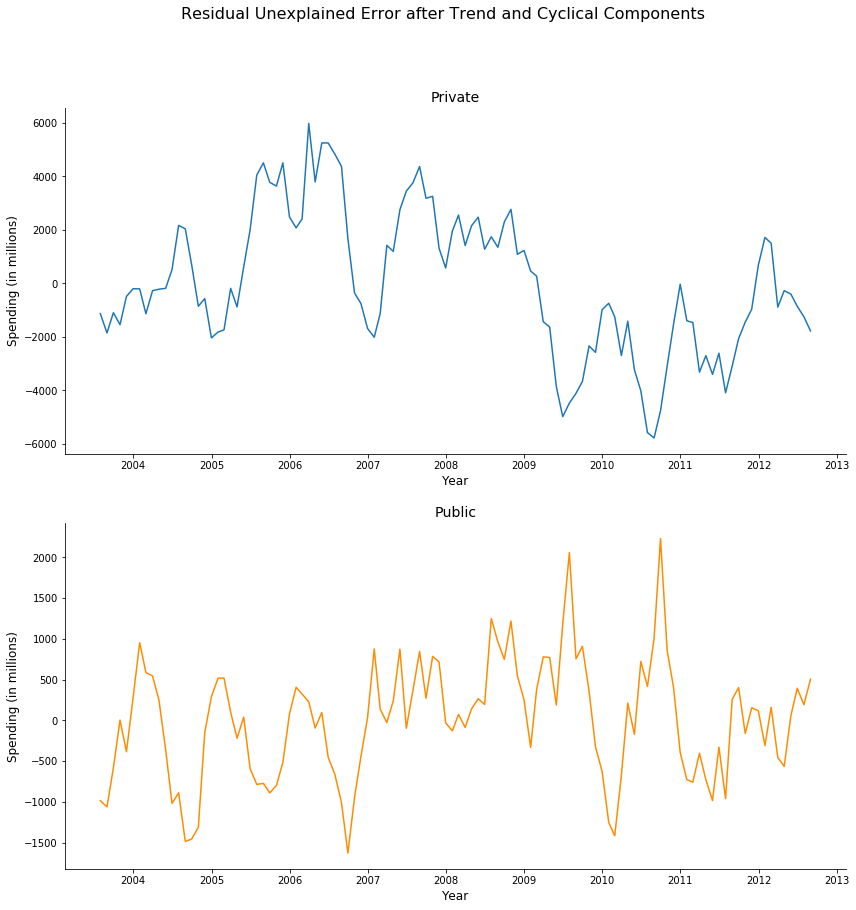

In [44]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['R2Private'],label='Private Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Private', fontsize = 14)

ax1.plot(dfConst['R2Public'],label='Public Remainder after Trend and Cyclical Components', c = 'darkorange')
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Public', fontsize = 14)

fig.set_size_inches(14, 14)
fig.suptitle('Residual Unexplained Error after Trend and Cyclical Components', fontsize = 16)


maxCorrPriv = 0.0
maxCorrPub = 0.0
period = np.NaN
print('Private correlation for remaining error after trend and cyclical components:')
for i in range(1,13):
    corr = dfConst['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPriv:
        maxCorrPriv = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorrPriv)
print('\n')
print('Public correlation for remaining error after trend and cyclical components:')
for i in range(1,13):
    corr = dfConst['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPub:
        maxCorrPub = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorrPub)


The code below graphs original public and private construction spending data sets against the modeled fit line.  Additionally, the unexplained residual in the model is shown on the same plot to provide context for deviation of the data from the model.

Text(0.5, 0.98, 'Fit Model Compared to Residual Error')

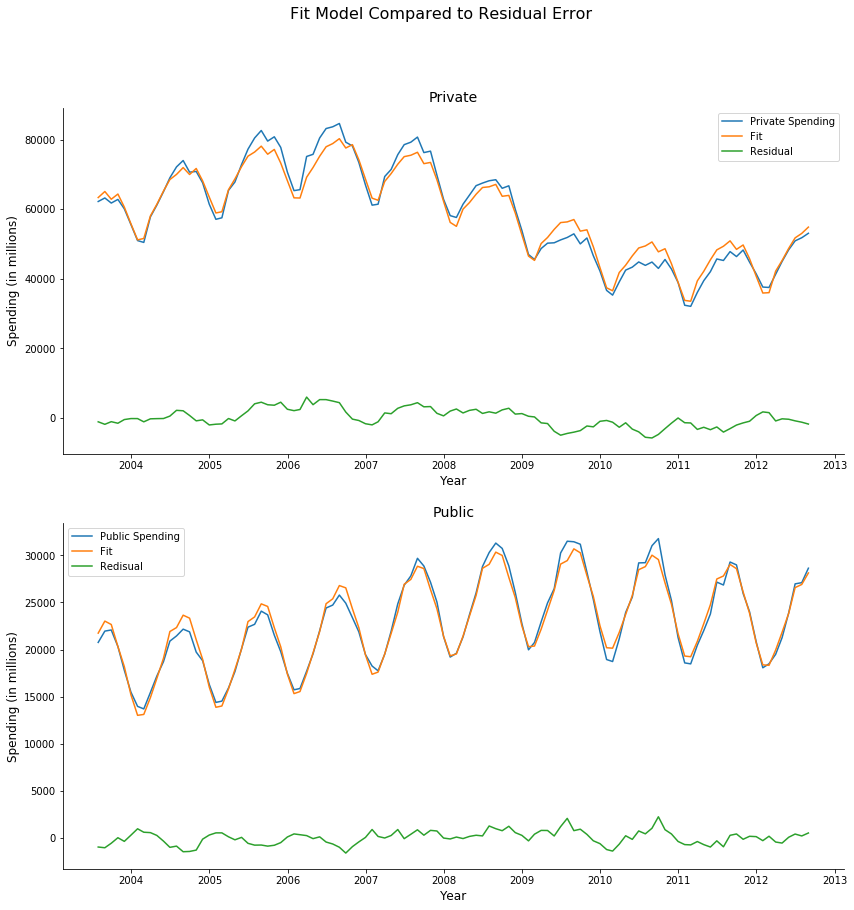

In [45]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['Private Construction'],label='Private Spending')
ax.plot(dfConst['fitPriv'],label='Fit')
ax.plot(dfConst['R2Private'],label='Residual')
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Private', fontsize = 14)
ax.legend()


ax1.plot(dfConst['Public Construction'], label='Public Spending')
ax1.plot(dfConst['fitPub'], label = 'Fit')
ax1.plot(dfConst['R2Public'], label = 'Redisual')
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Public', fontsize = 14)
ax1.legend()

fig.set_size_inches(14, 14)
fig.suptitle('Fit Model Compared to Residual Error', fontsize = 16)

